# Import Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load Dataset

In [10]:
# Load dataset
data = pd.read_csv("/content/Mall_Customers.csv")
print(data.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


# Select Features

In [11]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Data Preprocessing

In [12]:
# Scale the data for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find Optimal Number of Clusters

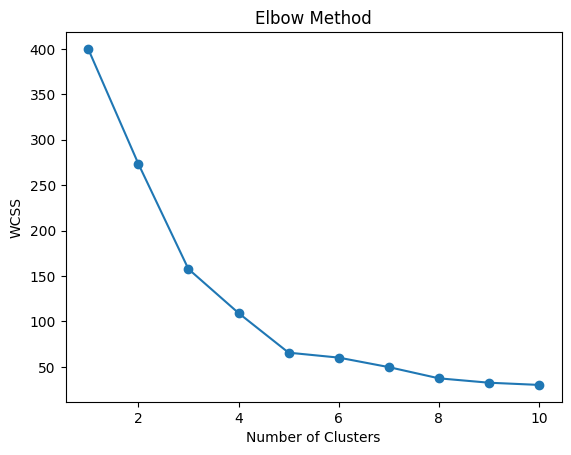

In [13]:
wcss = []  # within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-Means Clustering

In [14]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataset
data['Cluster'] = clusters


# Visualize Clusters

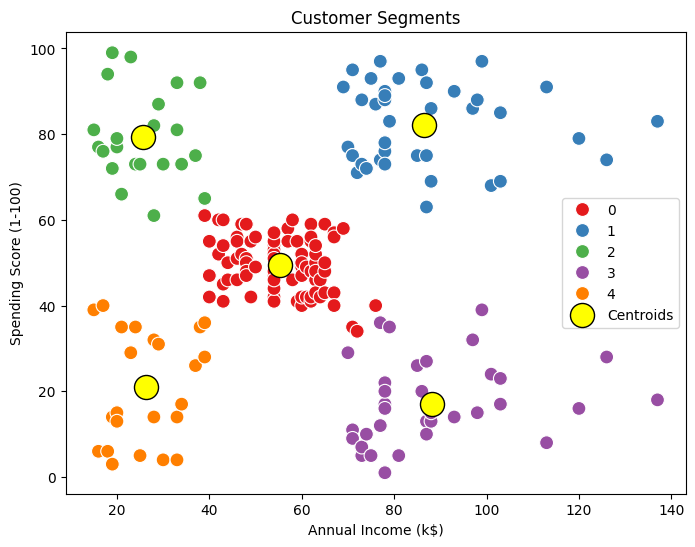

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Annual Income (k$)'],
                y=data['Spending Score (1-100)'],
                hue=data['Cluster'],
                palette='Set1', s=100)

plt.scatter(kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0],
            kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1],
            s=300, c='yellow', label='Centroids', edgecolors='black')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()